In [3]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import time


import sys
sys.path += ['Package/']  ### Specify the directory where the Package is
from functions_for_DDCSBM import *
from dynamic_SC_BH import *

import warnings
warnings.filterwarnings("ignore")

### Create the sequence of graphs $\{\mathcal{G}_t\}_{t=1,\dots,T}$

In [4]:
n = 500 # number of nodes
T = 4 # number of time-frames
n_clusters = 4 # number of communities
c_out = 20 # average number of connections between nodes in different communities
c = 250 # average degree
eta = 0.5 # label persistence
theta = np.random.uniform(3,10,n)**4 # vector theta
theta = theta/np.mean(theta) # E[theta_i] = 1
fluctuation = 1/n_clusters # fluctuations of off-diagonal elements of C (see documentation)
fraction = np.random.normal(1/n_clusters, 1/(4*n_clusters),n_clusters) # vector pi
fraction = fraction/np.sum(fraction) # \sum_i \pi_i = 1
C = matrix_C(c_out, c,fluctuation, fraction) # affinity matrix C


AT, Label = adjacency_matrix_series_DDCSBM(T, C, c, eta, theta,fraction) 

The plot below represents the adjacency matrices $A^{(t=1,\dots,T)}$, obtained from the function above. In the array "Label", one finds the label at each time-step. Then the alluvial graphs shows how the label vetor evolves through time

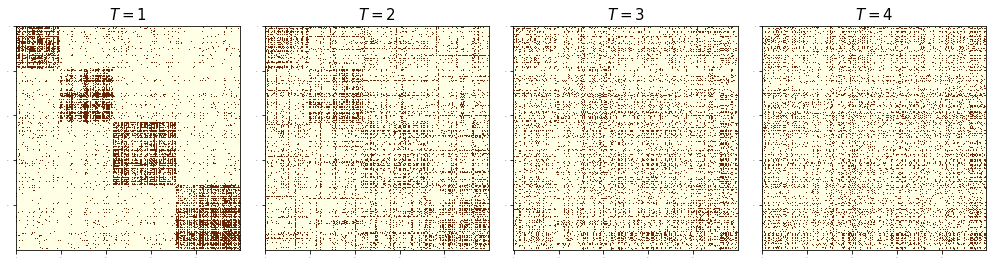

In [5]:
fig = plt.figure(figsize = (14,14))

ax1 = plt.subplot2grid((8,8), (2,0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid((8,8), (2,2), colspan=2, rowspan=2)
ax3 = plt.subplot2grid((8,8), (2,4), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((8,8), (2,6), colspan=2, rowspan=2)

cmap = 'YlOrBr'
fs = 15
ax1.imshow(AT[0].A,cmap=cmap)
ax1.set_title(r'$T=1$',fontsize = fs)
ax2.imshow(AT[1].A,cmap=cmap)
ax2.set_title(r'$T=2$',fontsize = fs)
ax3.imshow(AT[2].A,cmap=cmap)
ax3.set_title(r'$T=3$',fontsize = fs)
ax4.imshow(AT[3].A,cmap=cmap)
ax4.set_title(r'$T=4$',fontsize = fs)

ts = 0
ax1.tick_params(axis="x", labelsize=ts)
ax1.tick_params(axis="y", labelsize=ts)
ax2.tick_params(axis="x", labelsize=ts)
ax2.tick_params(axis="y", labelsize=ts)
ax3.tick_params(axis="x", labelsize=ts)
ax3.tick_params(axis="y", labelsize=ts)
ax4.tick_params(axis="x", labelsize=ts)
ax4.tick_params(axis="y", labelsize=ts)

plt.tight_layout()

plt.show();


transition = [np.zeros((n_clusters,n_clusters))]*(T-1)

for i in range(T-1):
    for j in range(n_clusters):
        idx = np.where(Label[i] == j)[0]
        for k in range(n_clusters):
            transition[i][j][k] = len(np.where(Label[i+1][idx] == k)[0])


c1 = 'lightsalmon'
c2 = 'paleturquoise'
c3 = 'lightgreen'
c4 = 'thistle'

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "B1", "C1", "D1", "A2", "B2", "C2", "D2","A3","B3","C3","D3","A4","B4","C4","D4"],
      color = ['red','blue','darkgreen','indigo','red','blue','darkgreen','indigo','red','blue','darkgreen','indigo','red','blue','darkgreen','indigo']
    ),
    link = dict(
      source = [0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3,
                4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7,
               8,8,8,8,9,9,9,9,10,10,10,10,11,11,11,11], # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = [4,5,6,7,4,5,6,7,4,5,6,7,4,5,6,7,
                8,9,10,11,8,9,10,11,8,9,10,11,8,9,10,11,
               12,13,14,15,12,13,14,15,12,13,14,15,12,13,14,15],
      value = [transition[0][0][0],transition[0][0][1],transition[0][0][2],transition[0][0][3],
              transition[0][1][0],transition[0][1][1],transition[0][1][2],transition[0][1][3],
              transition[0][2][0],transition[0][2][1],transition[0][2][2],transition[0][2][3],
              transition[0][3][0],transition[0][3][1],transition[0][3][2],transition[0][3][3],
              transition[1][0][0],transition[1][0][1],transition[1][0][2],transition[1][0][3],
              transition[1][1][0],transition[1][1][1],transition[1][1][2],transition[1][1][3],
              transition[1][2][0],transition[1][2][1],transition[1][2][2],transition[1][2][3],
              transition[1][3][0],transition[1][3][1],transition[1][3][2],transition[1][3][3],
              transition[2][0][0],transition[2][0][1],transition[2][0][2],transition[2][0][3],
              transition[2][1][0],transition[2][1][1],transition[2][1][2],transition[2][1][3],
              transition[2][2][0],transition[2][2][1],transition[2][2][2],transition[2][2][3],
              transition[2][3][0],transition[2][3][1],transition[2][3][2],transition[2][3][3],
              
              ],
    color = [c1,c1,c1,c1,c2,c2,c2,c2,c3,c3,c3,c3,c4,c4,c4,c4,   
            c1,c1,c1,c1,c2,c2,c2,c2,c3,c3,c3,c3,c4,c4,c4,c4,        
            c1,c1,c1,c1,c2,c2,c2,c2,c3,c3,c3,c3,c4,c4,c4,c4,        
            c1,c1,c1,c1,c2,c2,c2,c2,c3,c3,c3,c3,c4,c4,c4,c4        
            ]
  ))])

fig.show()

### Inference of the community structure 

In [6]:
n = 10000 # number of nodes
T = 5 # number of time-frames
n_clusters = 5 # number of communities
c_out = 2 # average number of connections between nodes in different communities
c = 6 # average degree
eta = 0.6 # label persistence
theta = np.random.uniform(3,10,n)**3 # vector theta
theta = theta/np.mean(theta) # E[theta_i] = 1
phi = np.mean(theta**2) # phi
fluctuation = 1/n_clusters # fluctuations of off-diagonal elements of C (see documentation)
fraction = np.random.normal(1/n_clusters, 1/(4*n_clusters),n_clusters) # vector pi
fraction = fraction/np.sum(fraction) # \sum_i \pi_i = 1
C = matrix_C(c_out, c,fluctuation, fraction) # affinity matrix C


AT, Label = adjacency_matrix_series_DDCSBM(T, C, c, eta, theta,fraction) 

## Algorithm 1

In [7]:
cluster = dynamic_community_detection(AT, eta, real_classes = Label, n_clusters = n_clusters)

print('The modularity for each time step is : ' + str(np.round(cluster.modularity,2)))
print('The overlap for each time step is : ' + str(np.round(cluster.overlap,2)))
print('The computational time for the eigenvectors is : ' + str(np.round(cluster.eigspace_time,2)))
print('The computational time for k-means is : ' + str(np.round(cluster.kmeans_time,2)))

The modularity for each time step is : [0.54 0.52 0.53 0.52 0.54]
The overlap for each time step is : [0.77 0.8  0.76 0.8  0.76]
The computational time for the eigenvectors is : 26.05
The computational time for k-means is : 2.94


## Algorithm 2

In [8]:
cluster = dynamic_community_detection_JL(AT, eta, n_clusters, real_classes = Label)

print('The modularity for each time step is : ' + str(np.round(cluster.modularity,2)))
print('The overlap for each time step is : ' + str(np.round(cluster.overlap,2)))
print('The computational time for the eigenvectors is : ' + str(np.round(cluster.eigspace_time,2)))
print('The computational time for k-means is : ' + str(np.round(cluster.kmeans_time,2)))

The modularity for each time step is : [0.49 0.44 0.44 0.44 0.49]
The overlap for each time step is : [0.68 0.63 0.61 0.63 0.67]
The computational time for the eigenvectors is : 15.88
The computational time for k-means is : 20.66
